In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from donchian_ma import get_data,Strategy
# plt.style.use('seaborn')

In [4]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['SOL']#,'ETC','BTC','ETH','BCH','AAVE','AVAX','MATIC','XLM','MKR','APT','EGLD','GRT','ALGO']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 84.85 %
MDD: 42.94 %
MDD Duration 270 days 00:00:00
worst trade: -17.22 %
2022-02-24 03:00:00 ~ 2022-02-24 19:00:00
avg holding days: 1.26 days
--------------------------------------------
PF: 1.66
Sharpe Ratio: 1.21
Calmar Ratio: 1.54
Sortino Ratio: 1.83
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 1.06 %
Total Time Exposure : 27.66 %
Total Trades: 150
Win Rate: 44.67 %
--------------------------------------------
PF * Win Rate: 0.743


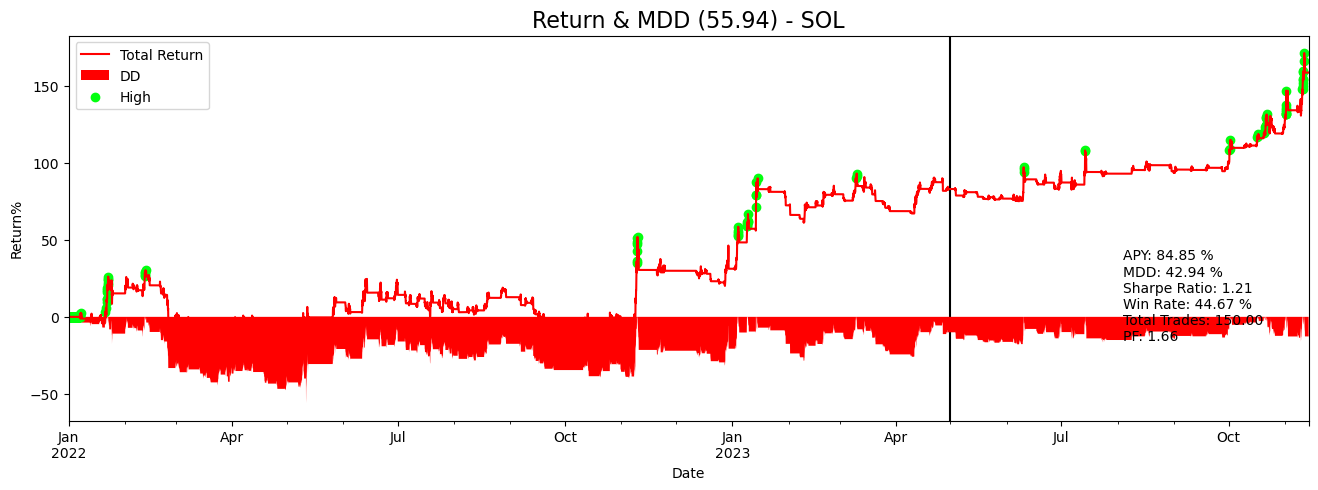

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-14 00:00:00
 Period                                682 days 01:00:00
 Start Value                                     10000.0
 Min Value                                   7434.030542
 Max Value                                  27125.274404
 End Value                                  25854.850768
 Total Return [%]                             158.548508
 Benchmark Return [%]                         -70.034223
 Total Time Exposure [%]                       27.655935
 Max Gross Exposure [%]                       142.699387
 Max Drawdown [%]                              42.936235
 Max Drawdown Duration                 270 days 00:00:00
 Total Orders                                        300
 Total Fees Paid                              886.663531
 Total Trades                                        150
 Win Rate [%]                                  44.666667
 Best Trade [%]         

In [6]:
start = '2022-01-01'
sep = ''
end = ''

params = {"uchannel":120,
          "lchannel":120,
          "ma_window":24}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003, 'weekend_filter':False}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

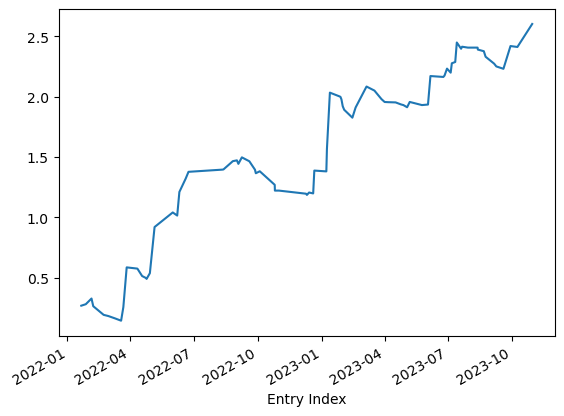

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL BOTH Optimize Test =======================
Optimization trails: 400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.1s finished


Optimization time: 8.13 sec
---------- SOL BOTH ----------
{'uchannel': 340, 'lchannel': 250}
APY: 73.71 %
MDD: 60.22 %
MDD Duration 213 days 09:00:00
worst trade: -74.28 %
2023-01-03 15:00:00 ~ 2023-02-09 03:00:00
avg holding days: 16.98 days
--------------------------------------------
PF: 1.45
Sharpe Ratio: 1.04
Calmar Ratio: 1.11
Sortino Ratio: 1.48
Omega Ratio: 1.04
--------------------------------------------
Expectancy : 3.50 %
Total Time Exposure : 97.86 %
Total Trades: 28
Win Rate: 77.78 %
--------------------------------------------
PF * Win Rate: 1.127


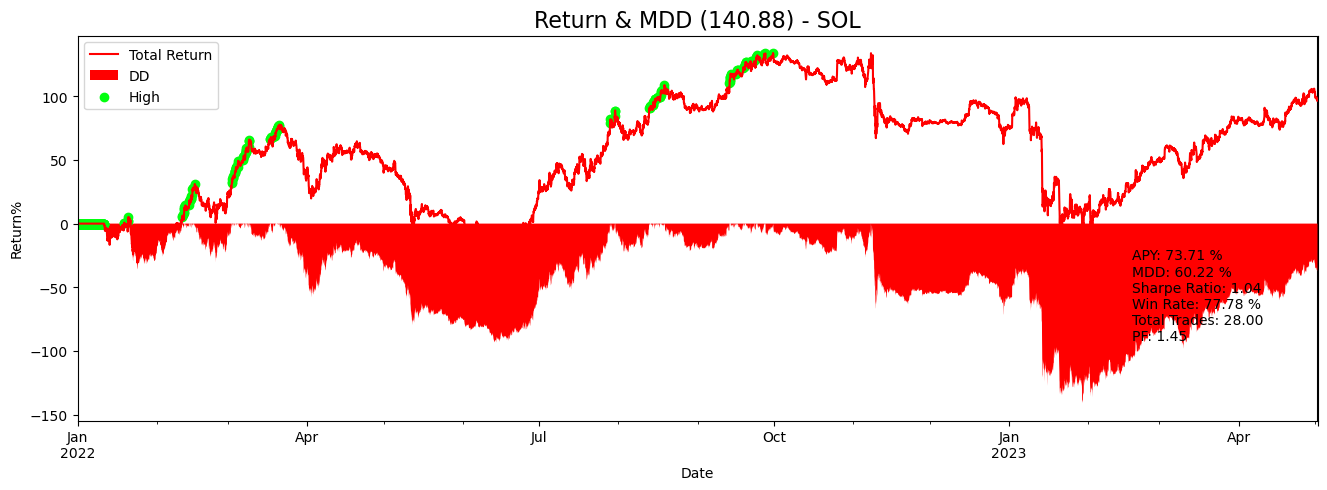

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     60.08 | 8050.48 | -2125.44 |       3.79 |   71.43 |          7 |
| 2022-06    |     -8.09 | 5256.71 | -6110.4  |       0.86 |   66.67 |          3 |
| 2022-09    |     73.89 | 7675.92 |  -286.44 |      26.8  |   83.33 |          6 |
| 2022-12    |    -25.52 | 2522.82 | -5074.62 |       0.5  |   75    |          4 |
| 2023-03    |    -10.04 | 6423.47 | -7427.68 |       0.86 |   83.33 |          6 |
| 2023-06    |      8.89 |  889.36 |     0    |     inf    |  100    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+


In [10]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['']
sample_sets = [[start,end]]
freq = '1h'

params = {"uchannel":[200,400,10],
          "lchannel":[200,400,10]}

config = {'freq':'1h','fee': 0.0003}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(['SOL'],sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
